### **Data**

[Transactions Data Bank ⛔||⛔ Fraud Detection](https://www.kaggle.com/datasets/qusaybtoush1990/transactions-data-bank-fraud-detection?resource=download)

### **Импорт библиотек**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, HTML
from datetime import datetime

### **Загрузка данных**

In [ ]:
file_id = '1xoDH4u_CzwtpMNU3WA9-9VhwR7dZjaI4'  # из .../file/d/<ID>/view
url = f'https://drive.google.com/uc?export=download&id={file_id}'
data = pd.read_csv(url)

### **Описание датасета**

|Сolumn  | Description |
|------------|-------------|
|Date | Date of Transaction|
|nameOrig | User Name or Account number|
|amount | Money in this transaction|
|oldbalanceOrg | How much the client had money before transaction|
|newbalanceOrig | How much the client have after the transaction|
|City |where the transaction happened which city|
|type | Type of transaction TRANSFER \ CASH_OUT, CASH_IN ,DEBIT,PAYMENT|
|Card Type | The card type the client has \ Platinum ,Gold ,Silver ,Signature ,Classic ,Mass|
|Exp Type | The purpose for transaction \ Food, Entertainment, Fuel, Bills, Grocery, Travel, Personal_Care, Health_Fitness, Home|
|Gender |Male or Female|
|isFraud | 0 = no fraud, 1 = fraud|


#### **Разбиение задач**

|          Задача                 | Ответственный | Статус |
|---------------------------------|---------------|--------|
|Проверка данных на наличие ошибочных|        | |
|Изучение поведения каждого признака в отдельности, его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом).|Дима| |
|Визуализация попарных распределени признаков (sns.pairplot()) и корреляции наиболее значимых. Построение подходящие сводные таблицы и прочие диаграммы|Дима| |
|Посторить красивые графики зависимости для числовых переменных || |
|Распределения в правильном масштабе|| |
|Card Type & Amount: сводные статистики и выбросы|| |
|Балансовая проверка|Миша| |
|География операций и их частоты|Миша| |
|Профиль по card_type: какие операции преобладают|Миша| |
|Пики точёные|Миша| |
|Ресёрч: красные флажки фродовых операций|| |
|Корреляционная матрица и проверка на мультиколлинеарность|Дима| |
|Формулировка выводов разведочного анализа. Как они будут задействоваться в последующих этапах?|| |
|**Доп задачи**|| |
|Добавить в репозиторий папки data, notebooks, reports/figures   || |
|Выгрузить на гит датасет, ноутбук, граифики из ноутбука, заполнить ридми выводами по EDA  || |


#### **Вывод первых и последних значений**

In [ ]:
data.head()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,26-May-13,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,26-Jul-12,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,12-Apr-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,28-Jan-12,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,16-Apr-14,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


In [ ]:
data.tail()

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
1048569,20-Jan-14,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0
1048570,06-Mar-14,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0
1048571,13-Mar-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0
1048572,02-Apr-14,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0
1048573,02-Apr-13,C1841909664,6808.99,38900000.0,38893191.01,"Lucknow, India",CASH_IN,Signature,Bills,M,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Date            1048574 non-null  object 
 1   nameOrig        1048574 non-null  object 
 2   amount          1048574 non-null  float64
 3   oldbalanceOrg   1048574 non-null  float64
 4   newbalanceOrig  1048574 non-null  float64
 5   City            1048574 non-null  object 
 6   type            1048574 non-null  object 
 7   Card Type       1048574 non-null  object 
 8   Exp Type        1048574 non-null  object 
 9   Gender          1048574 non-null  object 
 10  isFraud         1048574 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.0+ MB


In [ ]:
data.shape

(1048574, 11)

In [ ]:
data.isna().sum()

,0
Date,0
nameOrig,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
City,0
type,0
Card Type,0
Exp Type,0
Gender,0


In [ ]:
data.isnull().sum()

,0
Date,0
nameOrig,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
City,0
type,0
Card Type,0
Exp Type,0
Gender,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.describe()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,1.048574e+06,1.048574e+06,1.048574e+06,1.048574e+06
mean,3.802767e+04,8.801983e+05,8.421706e+05,1.676420e-01
std,1.105168e+05,2.969968e+06,2.936373e+06,3.735482e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.470000e+02,4.343812e+03,9.180000e+02,0.000000e+00
50%,8.263000e+03,3.653918e+04,2.055200e+04,0.000000e+00
75%,2.365000e+04,1.366425e+05,9.030729e+04,0.000000e+00
max,1.000000e+07,3.890000e+07,3.889319e+07,1.000000e+00


In [ ]:
data.describe(include='object')

,Date,nameOrig,City,type,Card Type,Exp Type,Gender
count,1048574,1048574,1048574,1048574,1048574,1048574,1048574
unique,1326,1048316,986,5,6,9,2
top,26-Apr-14,C422210949,"Bengaluru, India",CASH_OUT,Silver,Food,F
freq,1167,2,143733,373641,275540,220115,551182


In [ ]:
def fmt(x, nd=2):  # 1 234 567.89
    return f'{x:,.{nd}f}'.replace(',', ' ')

desc = data[['amount','oldbalanceOrg','newbalanceOrig','isFraud']].describe().T
desc_fmt = desc.copy()
for c in desc.columns:
    nd = 0 if c in ['count','min','25%','50%','75%','max'] else 2
    desc_fmt[c] = desc[c].map(lambda v: fmt(v, nd))
print(desc_fmt)


                    count        mean           std min    25%     50%  \
amount          1 048 574   38 027.67    110 516.83   0    647   8 263   
oldbalanceOrg   1 048 574  880 198.29  2 969 967.50   0  4 344  36 539   
newbalanceOrig  1 048 574  842 170.62  2 936 373.40   0    918  20 552   
isFraud         1 048 574        0.17          0.37   0      0       0   

                    75%         max  
amount           23 650  10 000 000  
oldbalanceOrg   136 643  38 900 000  
newbalanceOrig   90 307  38 893 191  
isFraud               0           1  


In [ ]:
cols = ['amount','oldbalanceOrg','newbalanceOrig','isFraud']

# счётчики нулей и доли
zeros_cnt = (data[cols] == 0).sum().rename('zeros_cnt')
zeros_pct = (data[cols] == 0).mean().mul(100).round(2).rename('zeros_%')

# приклеим к твоему desc_fmt
desc_with_zeros = desc_fmt.join(pd.concat([zeros_cnt, zeros_pct], axis=1))

# красивый формат для счетчика
desc_with_zeros['zeros_cnt'] = desc_with_zeros['zeros_cnt'].map(lambda v: f'{v:,}'.replace(',', ' '))

print(desc_with_zeros)


                    count        mean           std min    25%     50%  \
amount          1 048 574   38 027.67    110 516.83   0    647   8 263   
oldbalanceOrg   1 048 574  880 198.29  2 969 967.50   0  4 344  36 539   
newbalanceOrig  1 048 574  842 170.62  2 936 373.40   0    918  20 552   
isFraud         1 048 574        0.17          0.37   0      0       0   

                    75%         max zeros_cnt  zeros_%  
amount           23 650  10 000 000   180 353    17.20  
oldbalanceOrg   136 643  38 900 000   180 128    17.18  
newbalanceOrig   90 307  38 893 191   181 615    17.32  
isFraud               0           1   872 789    83.24  


> Пропуски, дубликаты, нулевые значения ***отсутствуют***

In [ ]:
data.columns

Index(['Date', 'nameOrig', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'City',
       'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud'],
      dtype='object')

In [ ]:
print("Доля мошеннических операций в датасете:")
print(data['isFraud'].value_counts()/ len(data) * 100 )

Доля мошеннических операций в датасете:
isFraud
0    83.235804
1    16.764196
Name: count, dtype: float64


In [ ]:
print('Число операций, совершенных конкретным пользователем')
data['nameOrig'].value_counts() #

Число операций, совершенных конкретным пользователем


,count
nameOrig,
C422210949,2
C637055752,2
C1738972765,2
C1214450722,2
C620899653,2
...,...
C502290755,1
C839317242,1
C1464274506,1


In [ ]:
print(f'Всего операций в датасете {data.shape[0]}. Пользователей банка {data['nameOrig'].value_counts().count()}')

Всего операций в датасете 1048574. Пользователей банка 1048316


###**Круговая диаграмма количества совершенных операций по типам транзакций**

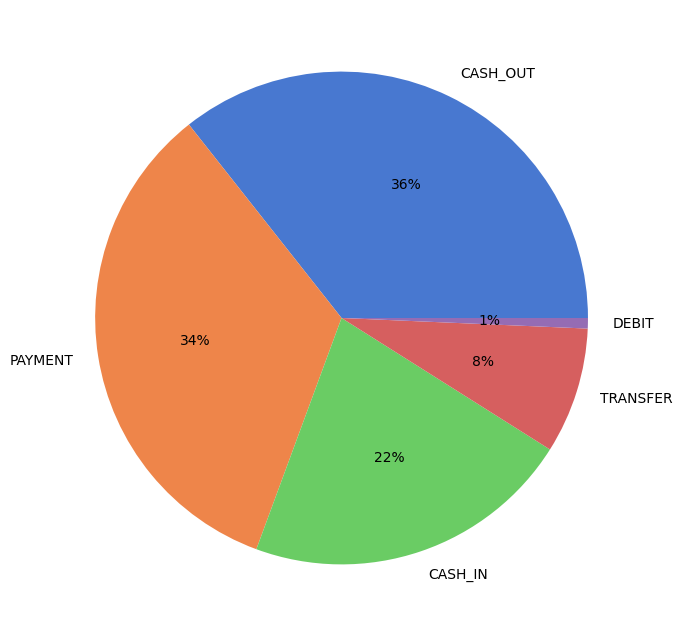

In [ ]:
display(Markdown('###**Круговая диаграмма количества совершенных операций по типам транзакций**'))
# data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(data['type'].value_counts().values, labels=data['type'].value_counts().index, colors=sns.color_palette('muted'), autopct='%.0f%%')
plt.show()

####**Проверка данных на наличие ошибочных**
Есть в данных что-то по типу отрицательного возраста или пятиметровый рост человека, 3-го класса в задаче бинарной классификации. Обработка ошибок

##### **Разница между балансами**

In [ ]:
data[round(abs(data['newbalanceOrig'] - data['oldbalanceOrg']),2) != round(abs(data['amount']),2)]

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud


> amount равен разнице между новым и старым балансом

##### **Распределение количества операций по дням**

In [ ]:
# Преобразуем Date из str в datetime
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce',  format='%d-%b-%y')

In [ ]:
print(data['Date'][0])
print(type(data['Date'][0]))

2013-05-26 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Text(0, 0.5, 'Количество')

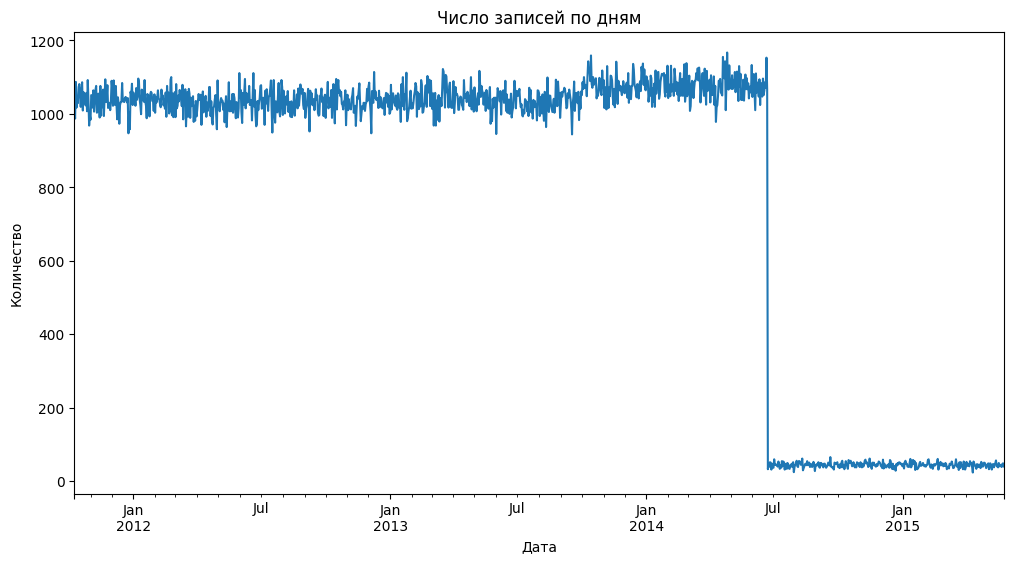

In [ ]:
daily_counts = (data
                .groupby(data['Date'])
                .size())

ax = daily_counts.plot(figsize=(12,6), title='Число записей по дням')
ax.set_xlabel('Дата')
ax.set_ylabel('Количество')


> в распределении данных наблюдается какая-то аномалия

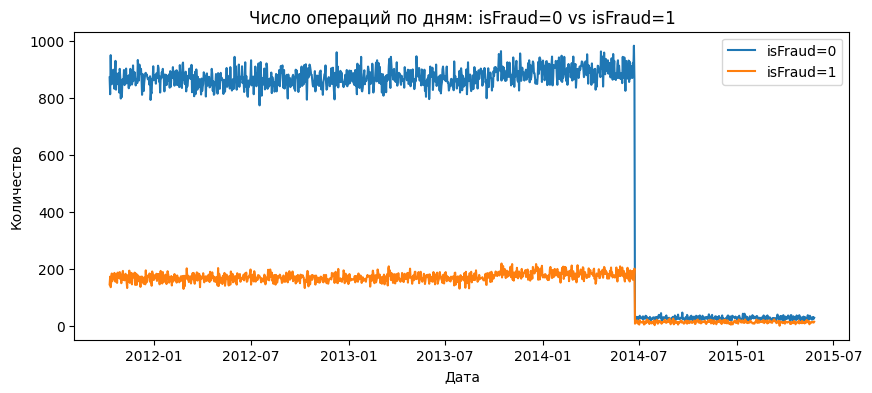

In [ ]:
# считаем число операций по дням и классу isFraud
daily_fraud = (
    data
    .assign(date=data['Date'].dt.date)
    .groupby(['date', 'isFraud'])
    .size()
    .unstack('isFraud', fill_value=0)
    .sort_index()
)

ax = daily_fraud.plot(figsize=(10,4), title='Число операций по дням: isFraud=0 vs isFraud=1')
ax.set_xlabel('Дата'); ax.set_ylabel('Количество')
ax.legend(['isFraud=0', 'isFraud=1'])

> окей. вопрос такого спадка числа ежеденых операций остаётся открытым

гипотезы:
*    отток клиентов
*    уход в чёрную




####**В каких городах/странах совершались операции?**

In [ ]:
data['City'].apply(lambda x: x.split(', ')[1]).unique()

array(['India'], dtype=object)

> Все операции совершались в Индии

###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**

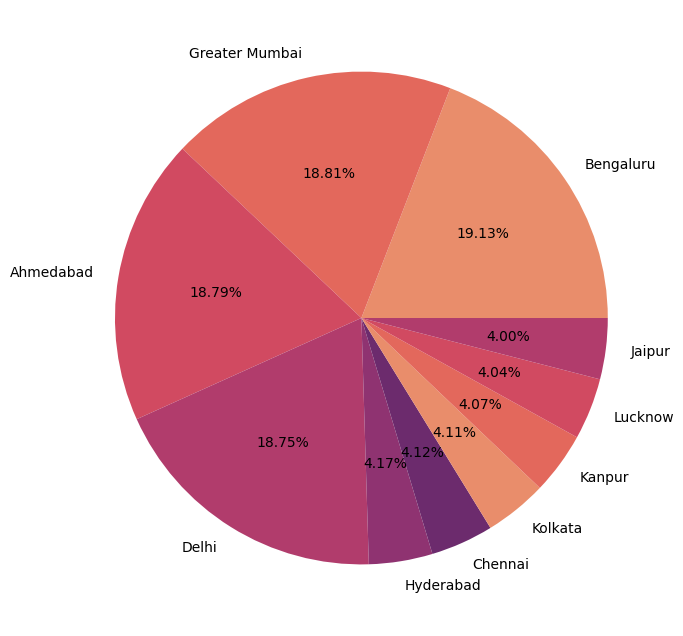

In [ ]:
display(Markdown('###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**'))
top_transaction_cities = data['City'].apply(lambda x: x.split(', ')[0]).value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_transaction_cities.values, labels=top_transaction_cities.index, colors=sns.color_palette('flare'), autopct='%.2f%%')
plt.show()

> 4 крупнейших сегмента (вместе ~76%):

*   Бенгалуру
*   Дели
*   Ахмедабад
*   Мумбаи

> Остальные 6 городов (суммарно ~24%)
*   Хайдарабад
*   Ченнаи
*   Колката
*   Канпур
*   Лакхнау
*   Джайпур

In [ ]:
data.head()


,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud
0,2013-05-26,C2011200430,242.0,302.0,60.0,"Ahmedabad, India",TRANSFER,Gold,Food,F,1
1,2012-07-26,C931301500,7081.0,46066.0,38985.0,"Delhi, India",TRANSFER,Gold,Entertainment,M,1
2,2012-04-12,C963642457,16355.0,30355.0,14000.0,"Kolkata, India",TRANSFER,Silver,Fuel,F,1
3,2012-01-28,C1439438217,20820.0,39663.0,18843.0,"Lucknow, India",TRANSFER,Gold,Food,F,1
4,2014-04-16,C892940485,6071.0,35586.0,29515.0,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1


####**Изучение поведения каждого признака в отдельности**
\+ проверить его связь с целевой переменной, а также попарные корреляции (в т.ч и в особенности с таргетом).

In [ ]:
from sklearn.preprocessing import LabelEncoder

selected_columns = data.loc[:, ['type', 'Card Type', 'Exp Type', 'Gender', 'City']]
# Создание LabelEncoder объекта
label_encoder = LabelEncoder()

# Кодирование столбцов
encoded_columns = {}
for column in selected_columns:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])
    # Сохраняем маппинг
    encoded_columns[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Вывод DataFrame
display(data)

# Вывод легенды кодировки для каждого столбца
for column, mapping in encoded_columns.items():
    print(f"Кодировка для {column}:", mapping)

,Date,nameOrig,amount,oldbalanceOrg,newbalanceOrig,City,type,Card Type,Exp Type,Gender,isFraud,type_encoded,Card Type_encoded,Exp Type_encoded,Gender_encoded,City_encoded
0,2013-05-26,C2011200430,242.00,302.0,60.00,"Ahmedabad, India",TRANSFER,Gold,Food,F,1,4,1,2,0,8
1,2012-07-26,C931301500,7081.00,46066.0,38985.00,"Delhi, India",TRANSFER,Gold,Entertainment,M,1,4,1,1,1,126
2,2012-04-12,C963642457,16355.00,30355.0,14000.00,"Kolkata, India",TRANSFER,Silver,Fuel,F,1,4,5,3,0,267
3,2012-01-28,C1439438217,20820.00,39663.0,18843.00,"Lucknow, India",TRANSFER,Gold,Food,F,1,4,1,2,0,300
4,2014-04-16,C892940485,6071.00,35586.0,29515.00,"Bengaluru, India",TRANSFER,Gold,Fuel,M,1,4,1,3,1,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2014-01-20,C1273896430,105150.78,38300000.0,38194849.22,"Kanpur, India",CASH_IN,Platinum,Fuel,F,0,0,3,3,0,237
1048570,2014-03-06,C1450387949,376022.62,38600000.0,38223977.38,"Kanpur, India",CASH_IN,Gold,Grocery,F,0,0,1,4,0,237
1048571,2013-03-13,C1040382471,77083.57,38400000.0,38322916.43,"Jaipur, India",CASH_IN,Gold,Fuel,F,0,0,1,3,0,203
1048572,2014-04-02,C1576842193,121569.82,38400000.0,38278430.18,"Surat, India",CASH_IN,Platinum,Grocery,F,0,0,3,4,0,821


Кодировка для type: {'CASH_IN': np.int64(0), 'CASH_OUT': np.int64(1), 'DEBIT': np.int64(2), 'PAYMENT': np.int64(3), 'TRANSFER': np.int64(4)}
Кодировка для Card Type: {'Classic': np.int64(0), 'Gold': np.int64(1), 'Mass': np.int64(2), 'Platinum': np.int64(3), 'Signature': np.int64(4), 'Silver': np.int64(5)}
Кодировка для Exp Type: {'Bills': np.int64(0), 'Entertainment': np.int64(1), 'Food': np.int64(2), 'Fuel': np.int64(3), 'Grocery': np.int64(4), 'Health_Fitness': np.int64(5), 'Home': np.int64(6), 'Personal_Care': np.int64(7), 'Travel': np.int64(8)}
Кодировка для Gender: {'F': np.int64(0), 'M': np.int64(1)}
Кодировка для City: {'Achalpur, India': np.int64(0), 'Adilabad, India': np.int64(1), 'Adityapur, India': np.int64(2), 'Adoni, India': np.int64(3), 'Adoor, India': np.int64(4), 'Afzalpur, India': np.int64(5), 'Agartala, India': np.int64(6), 'Agra, India': np.int64(7), 'Ahmedabad, India': np.int64(8), 'Ahmednagar, India': np.int64(9), 'Aizawl, India': np.int64(10), 'Ajmer, India': np.i

In [ ]:
data_encoded = data.drop(['Date', 'nameOrig', 'type', 'Card Type', 'Exp Type', 'Gender', 'City'], axis=1)

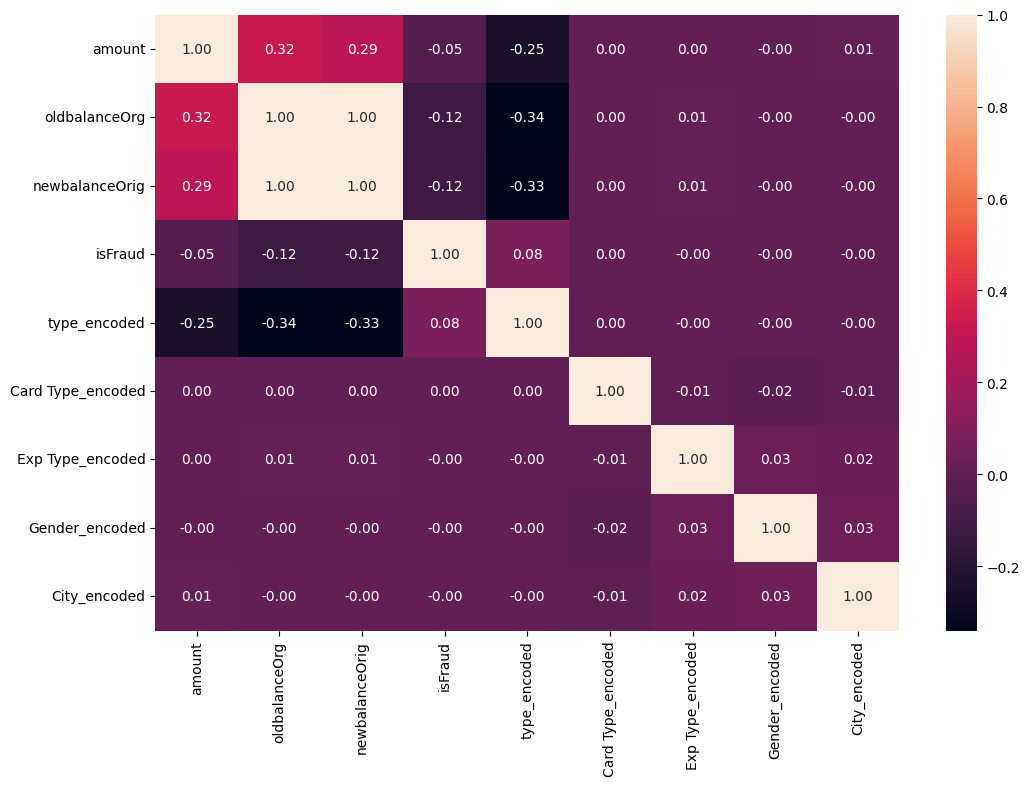

In [ ]:
plt.figure(figsize=(12, 8))

sns.heatmap(data_encoded.corr(), annot=True, fmt='.2f')
plt.show()

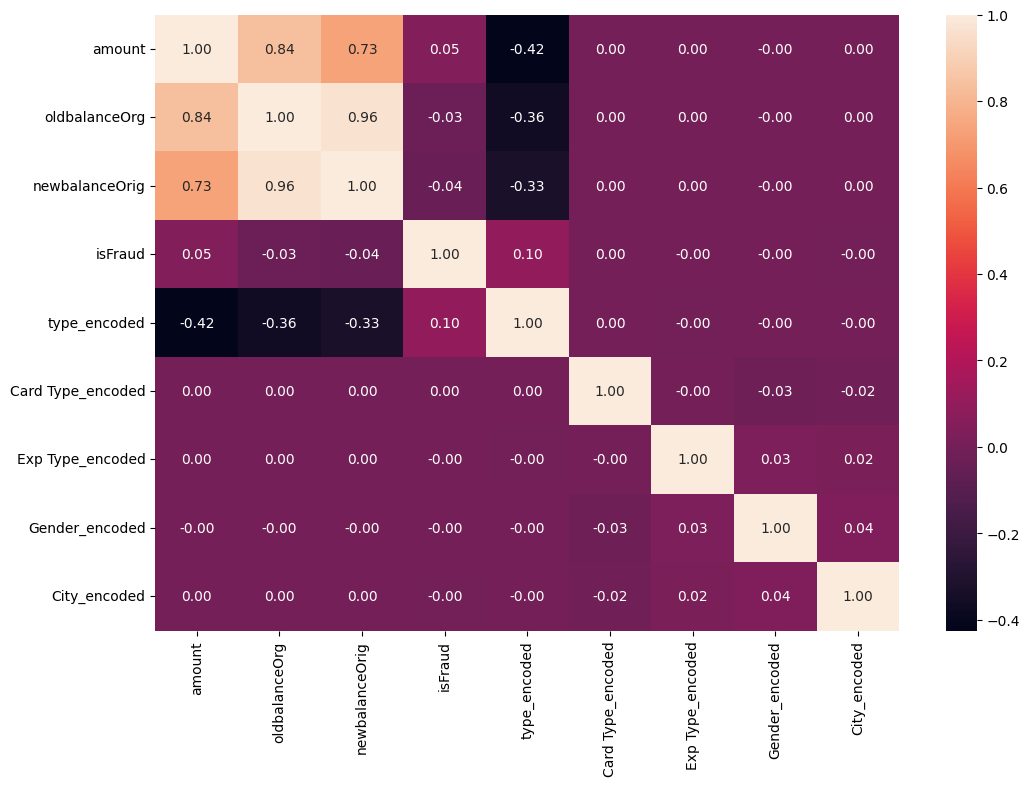

In [ ]:
# учитывая неоднородный характер данных, проверим еще корреляцию методом Спирмена
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(method="spearman"), annot=True, fmt='.2f')
plt.show()

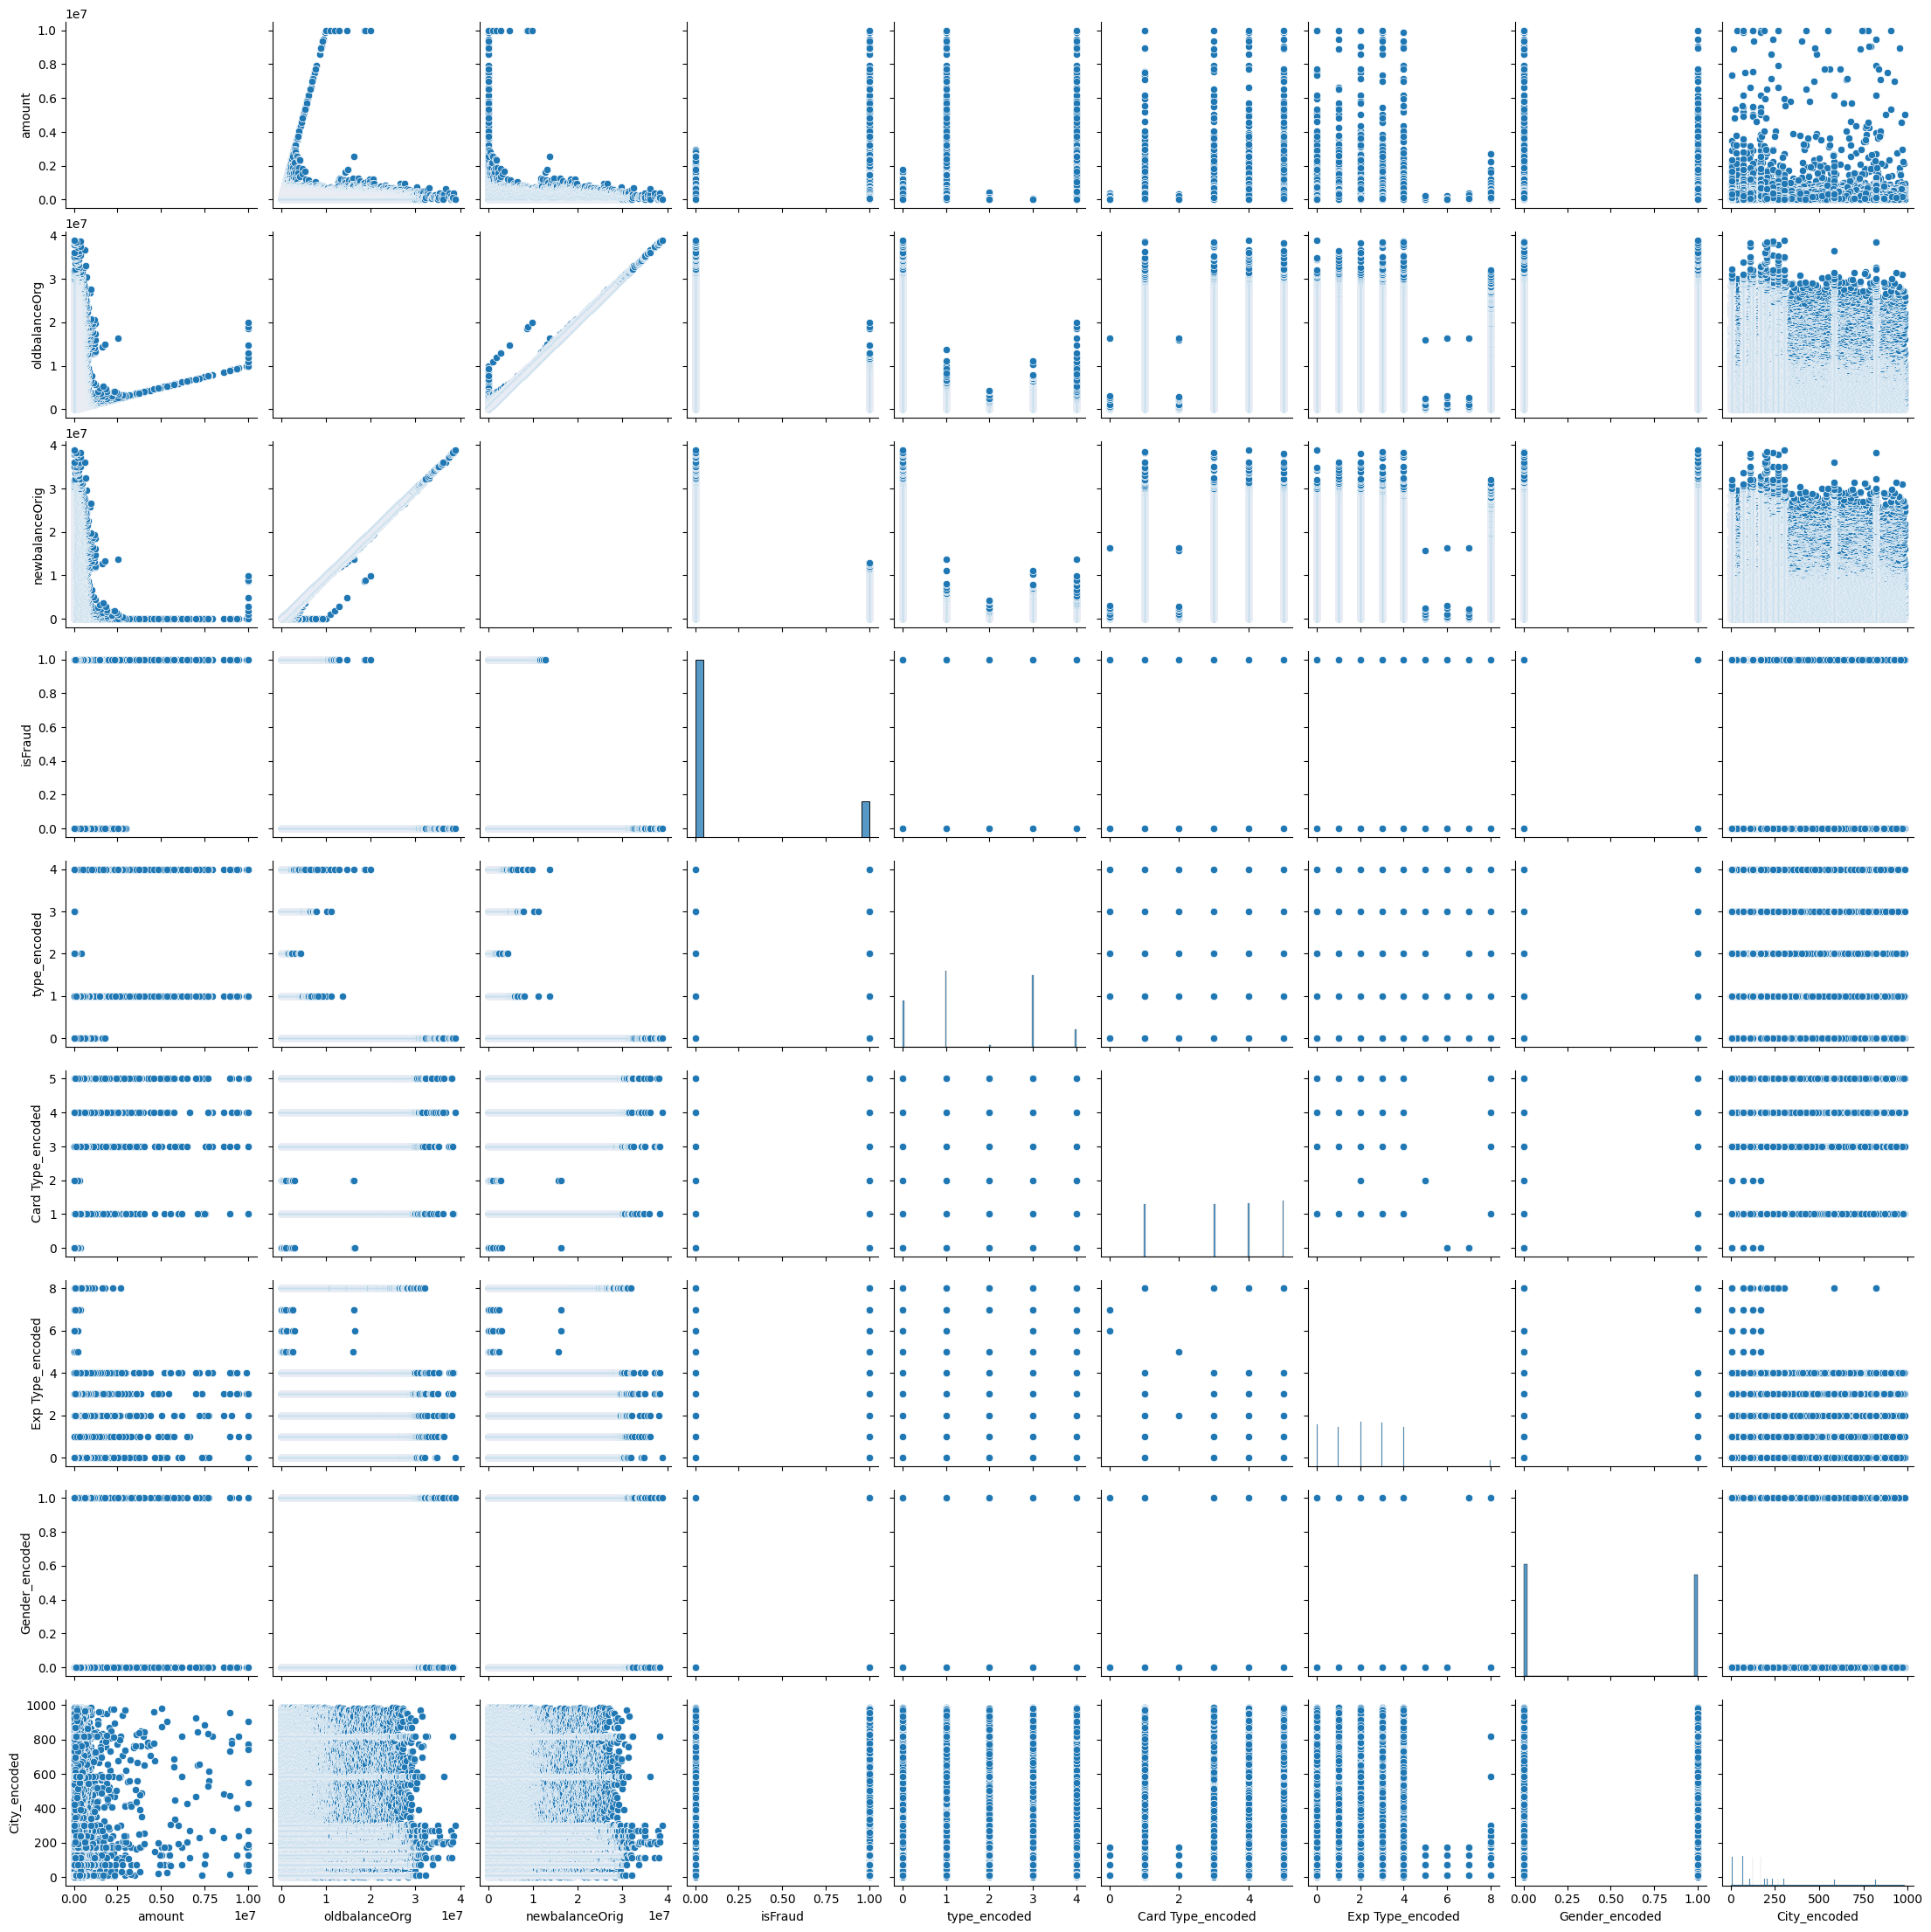

In [ ]:
sns.pairplot(data_encoded)
plt.show()

Корреляционная матрица не показала сколько-нибудь значимой корреляции какого-либо из признаков с целевой переменной. На графиках попарной зависимости не отображается квадратичной или иной зависимости. Можно только заметить, что мошеннических операций больше среди счетов с более низким балансом, а также среди операций на более высокие суммы

####**Картина зависимостей: pairplot, корреляции и пивоты**
Визуализация попарных распределений признаков (sns.pairplot()) и корреляции наиболее значимых. Построение подходящих сводных таблиц и прочих диаграмм


In [ ]:
data.columns

Index(['Date', 'nameOrig', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'City',
       'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud', 'type_encoded',
       'Card Type_encoded', 'Exp Type_encoded', 'Gender_encoded',
       'City_encoded'],
      dtype='object')

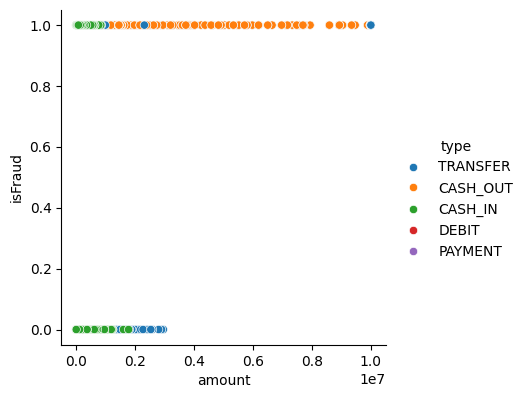

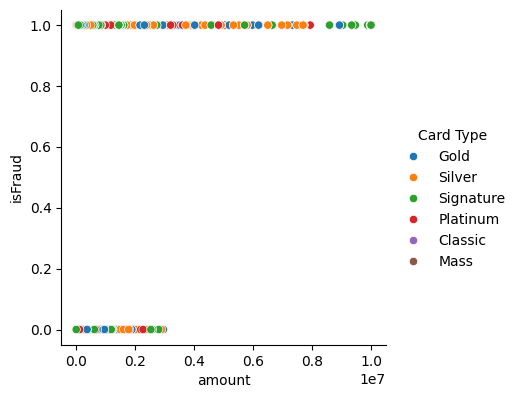

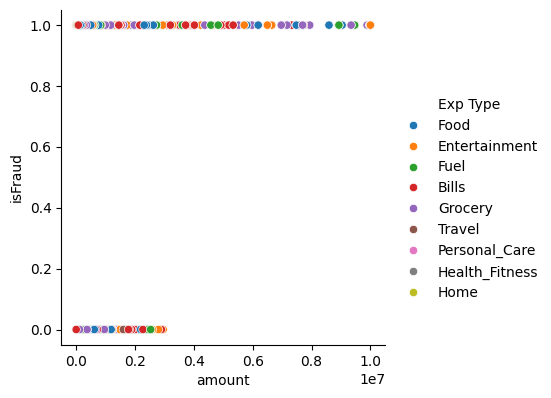

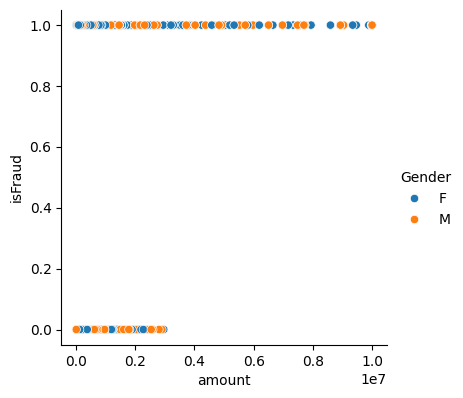

In [ ]:
for i in ["type", 'Card Type', 'Exp Type', 'Gender']:
    sns.pairplot(data,
        x_vars = ['amount'] , y_vars=['isFraud'],
        height = 4, hue=i
        #diag_kws = {'binwidth':2})
        )
    plt.show()

####**Посторить красивые графики зависимости для числовых переменных**

#### **Распределения в правильном масштабе**
Построить гистограммы/плотности для всех числовых признаков с адекватными шкалами. Смещены ли данные?



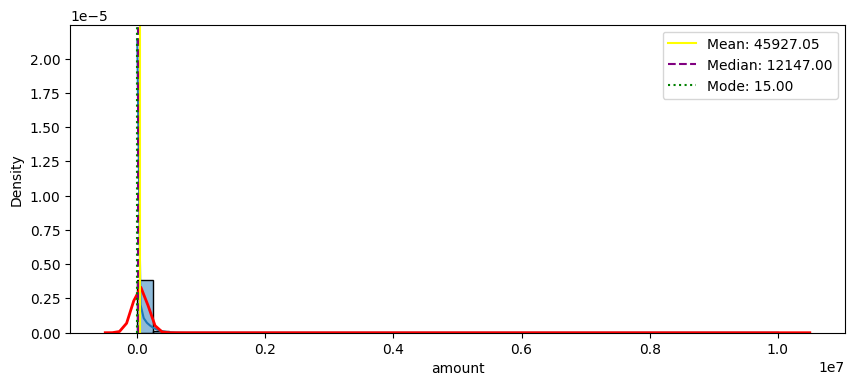

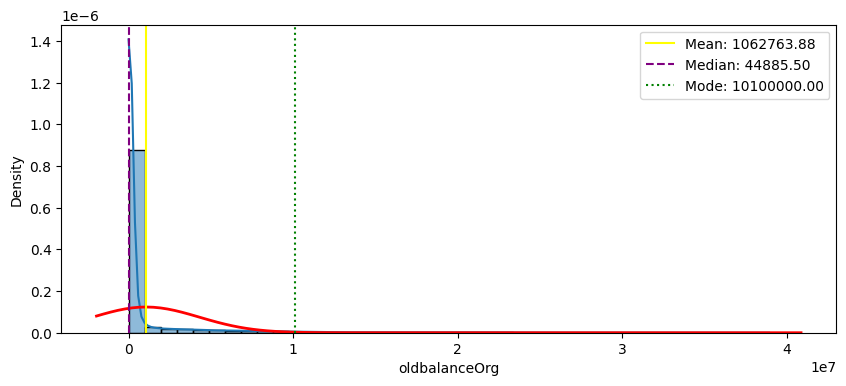

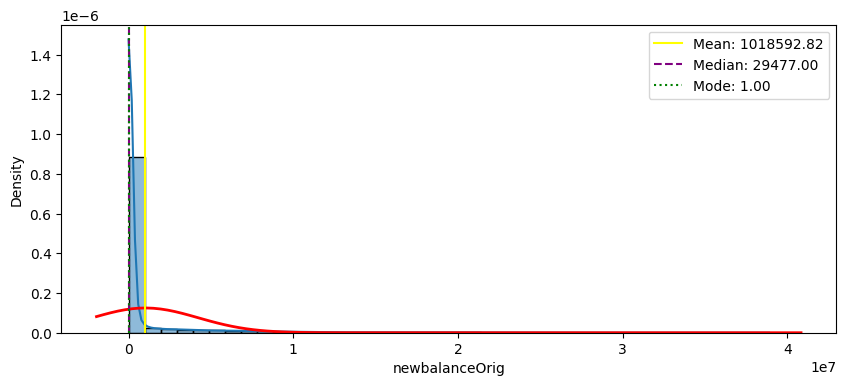

In [ ]:
from scipy.stats import norm
for i in ['amount', 'oldbalanceOrg', 'newbalanceOrig']:
   plt.figure(figsize=(10, 4))
   ds = data[data[i]!=0.0][i] #распределение бех нулевых значений

   ax = sns.histplot(ds, stat = "density", kde = True, bins = 40)
   x0,x1 = ax.get_xlim()
   x_pdf = np.linspace(x0,x1,100)
   params = norm.fit(ds)

   y_pdf = norm.pdf(x_pdf,*params)
   ax.plot(x_pdf, y_pdf, 'r', lw=2)

   plt.axvline(x=ds.mean(), color='yellow', label=f'Mean: {ds.mean():.2f}')
   plt.axvline(x=ds.median(), color='purple', ls='--', label=f'Median: {ds.median():.2f}')
   plt.axvline(x=ds.mode()[0], color='green', ls=':', label=f'Mode: {ds.mode()[0]:.2f}')
   plt.legend()


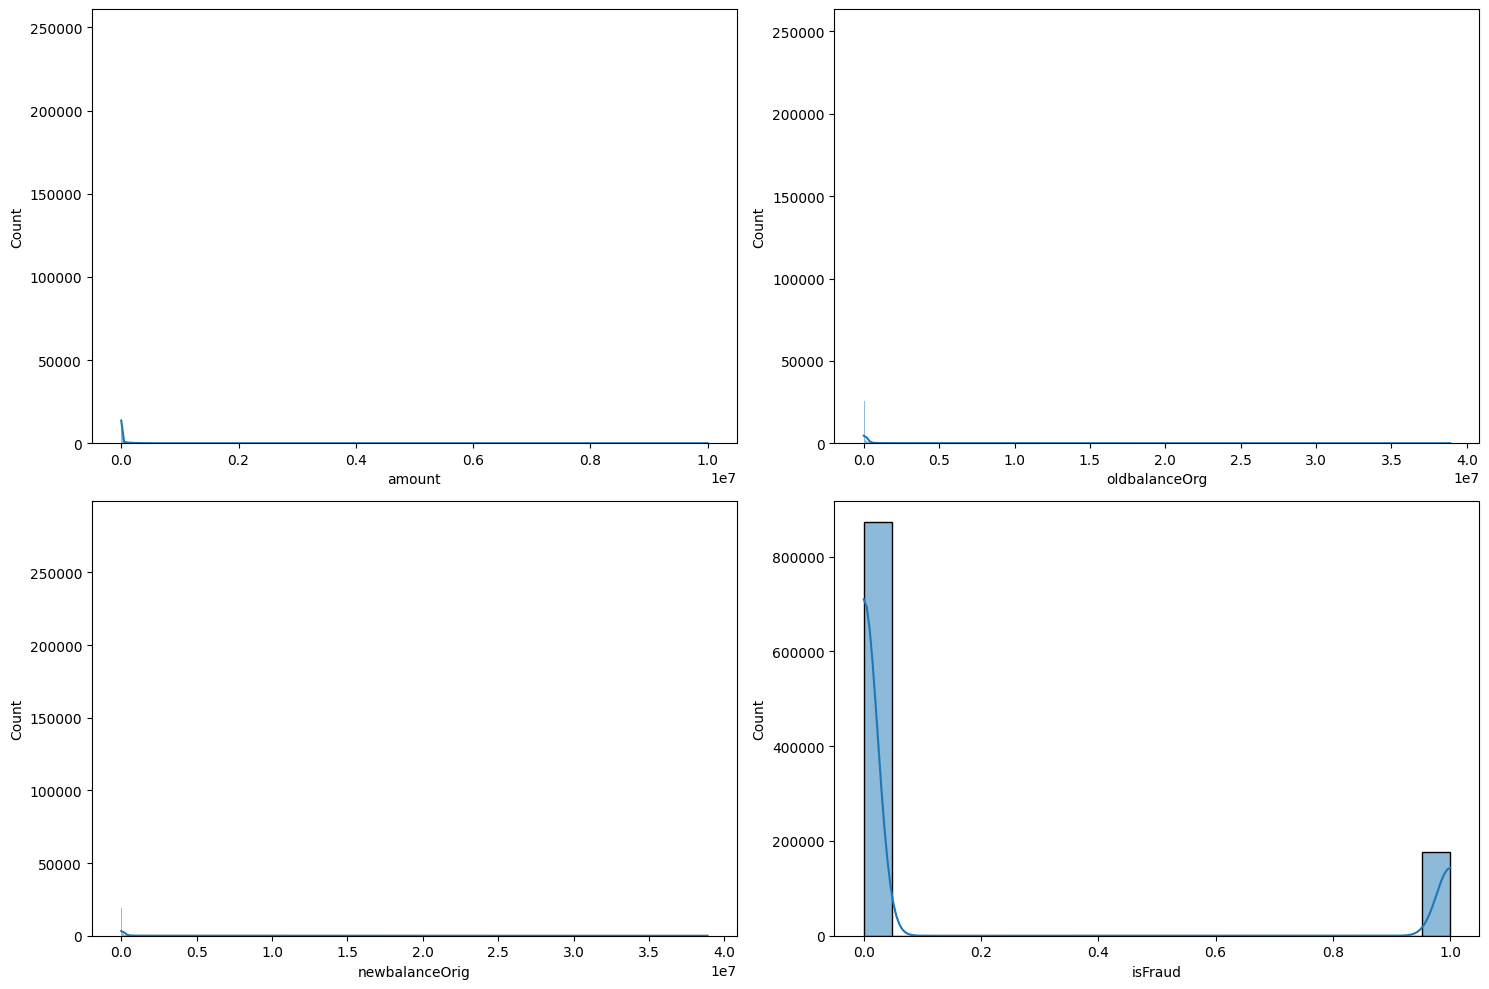

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(data[['amount',	'oldbalanceOrg',	'newbalanceOrig',	'isFraud']], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True)
plt.tight_layout()
plt.show()

In [ ]:
data.columns

Index(['Date', 'nameOrig', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'City',
       'type', 'Card Type', 'Exp Type', 'Gender', 'isFraud', 'type_encoded',
       'Card Type_encoded', 'Exp Type_encoded', 'Gender_encoded',
       'City_encoded'],
      dtype='object')

In [ ]:
print(data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']].describe().round(), end='')


           amount  oldbalanceOrg  newbalanceOrig    isFraud
count   1048574.0      1048574.0       1048574.0  1048574.0
mean      38028.0       880198.0        842171.0        0.0
std      110517.0      2969968.0       2936373.0        0.0
min           0.0            0.0             0.0        0.0
25%         647.0         4344.0           918.0        0.0
50%        8263.0        36539.0         20552.0        0.0
75%       23650.0       136643.0         90307.0        0.0
max    10000000.0     38900000.0      38893191.0        1.0

#### **Card Type & Amount: сводные статистики и выбросы**
Понять поведение суммы операций в разрезе *типа карты*

Группировка по card_type. min, max, mean для amount (или oldbalanceOrg, или newbalanceOrig)

Определить выбросы через IQR (границы [Q1−1.5·IQR, Q3+1.5·IQR]) для каждой группы

Визуализировать boxplot/violin + точки выбросов

In [ ]:
def iqr_outliers_by_group(df, value_col, group_col='type'):
    """
    Считает границы IQR и помечает выбросы отдельно в каждой группе.
    Возвращает:
      - summary: сводка по группам (count, min/max/mean/median, Q1/Q3/IQR, границы, число/долю выбросов)
      - outliers: строки-выбросы (группа + значение)
    """
    tmp = df[[group_col, value_col]].copy()
    tmp[value_col] = pd.to_numeric(tmp[value_col], errors='coerce')
    tmp = tmp.dropna(subset=[group_col, value_col])

    # Q1, Q3 и IQR для каждой строки по её группе
    grp = tmp.groupby(group_col)[value_col]
    Q1 = grp.transform(lambda s: s.quantile(0.25))
    Q3 = grp.transform(lambda s: s.quantile(0.75))
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    is_out = (tmp[value_col] < lower) | (tmp[value_col] > upper)

    # Сводка по группам (берём первые значения Q1/Q3/IQR/границ, т.к. они одинаковые внутри группы)
    summary = (
        tmp.assign(Q1=Q1, Q3=Q3, IQR=IQR, lower_fence=lower, upper_fence=upper, is_out=is_out)
          .groupby(group_col)
          .agg(
              count=(value_col, 'size'),
              min=(value_col, 'min'),
              max=(value_col, 'max'),
              mean=(value_col, 'mean'),
              median=(value_col, 'median'),
              Q1=('Q1', 'first'),
              Q3=('Q3', 'first'),
              IQR=('IQR', 'first'),
              lower_fence=('lower_fence', 'first'),
              upper_fence=('upper_fence', 'first'),
              outliers_count=('is_out', 'sum')
          )
          .assign(outliers_share_pct=lambda d: 100 * d['outliers_count'] / d['count'])
          .sort_index()
    )

    outliers = tmp.loc[is_out, [group_col, value_col]].reset_index(drop=True)
    return summary, outliers


sum_amount, outs_amount = iqr_outliers_by_group(data, 'amount', 'type')
sum_oldbal, outs_oldbal = iqr_outliers_by_group(data, 'oldbalanceOrg', 'type')
sum_newbal, outs_newbal = iqr_outliers_by_group(data, 'newbalanceOrig', 'type')


display(Markdown('**Сводка по amount**'))
display(Markdown('---'))
print(sum_amount)
print(outs_amount.head())

display(Markdown('**Сводка по oldbalanceOrg**'))
display(Markdown('---'))

print(sum_oldbal)
print(outs_oldbal.head())

display(Markdown('**Сводка по newbalanceOrig**'))
display(Markdown('---'))

print(sum_newbal)
print(outs_newbal.head())

**Сводка по amount**

---

           count  min          max           mean     median          Q1  \
type                                                                       
CASH_IN   227130  0.0   1781905.26  108281.006998  65640.045  13017.6775   
CASH_OUT  373641  0.0  10000000.00   26493.213563   9305.000   1156.0000   
DEBIT       7178  0.0    408672.22    3473.327268   1938.070    264.0000   
PAYMENT   353873  0.0     91716.91    5608.674886   2050.450      0.0000   
TRANSFER   86752  0.0  10000000.00   38873.121266  11596.000   3465.7500   

                   Q3          IQR   lower_fence   upper_fence  \
type                                                             
CASH_IN   167709.0425  154691.3650 -219019.37000  399746.09000   
CASH_OUT   21320.0000   20164.0000  -29090.00000   51566.00000   
DEBIT       4329.3425    4065.3425   -5834.01375   10427.35625   
PAYMENT     8657.5400    8657.5400  -12986.31000   21643.85000   
TRANSFER   21838.0000   18372.2500  -24092.62500   49396.37500   

    

**Сводка по oldbalanceOrg**

---

           count  min          max          mean      median        Q1  \
type                                                                     
CASH_IN   227130  0.0  38900000.00  3.761466e+06  1290287.01  42498.25   
CASH_OUT  373641  0.0  13800000.00  6.993255e+04    34461.00   7285.34   
DEBIT       7178  0.0   4362014.11  8.270637e+04    21150.00   1271.00   
PAYMENT   353873  0.0  11200000.00  9.849386e+04    12373.00      0.00   
TRANSFER   86752  0.0  19900000.00  8.107801e+04    38048.50  20950.25   

                    Q3           IQR   lower_fence   upper_fence  \
type                                                               
CASH_IN   5.538094e+06  5.495596e+06 -8.200896e+06  1.378149e+07   
CASH_OUT  4.797500e+04  4.068966e+04 -5.374915e+04  1.090095e+05   
DEBIT     7.499275e+04  7.372175e+04 -1.093116e+05  1.855754e+05   
PAYMENT   8.619500e+04  8.619500e+04 -1.292925e+05  2.154875e+05   
TRANSFER  4.812400e+04  2.717375e+04 -1.981038e+04  8.888462e+04   

    

**Сводка по newbalanceOrig**

---

           count  min          max          mean       median        Q1  \
type                                                                      
CASH_IN   227130  0.0  38893191.01  3.653185e+06  1121420.625  18554.00   
CASH_OUT  373641  0.0  13677730.46  4.343934e+04    17412.000   1629.00   
DEBIT       7178  0.0   4359375.18  7.923304e+04    17315.370    522.25   
PAYMENT   353873  0.0  11188024.73  9.288518e+04     6201.960      0.00   
TRANSFER   86752  0.0  13762928.45  4.220489e+04    22492.000   7285.92   

                    Q3           IQR   lower_fence   upper_fence  \
type                                                               
CASH_IN   5.376065e+06  5.357511e+06 -8.017712e+06  1.341233e+07   
CASH_OUT  3.323200e+04  3.160300e+04 -4.577550e+04  8.063650e+04   
DEBIT     6.992567e+04  6.940342e+04 -1.035829e+05  1.740308e+05   
PAYMENT   7.533330e+04  7.533330e+04 -1.130000e+05  1.883332e+05   
TRANSFER  3.483625e+04  2.755033e+04 -3.403958e+04  7.616174e+04  

/tmp/ipython-input-2543380786.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=order, showfliers=True)


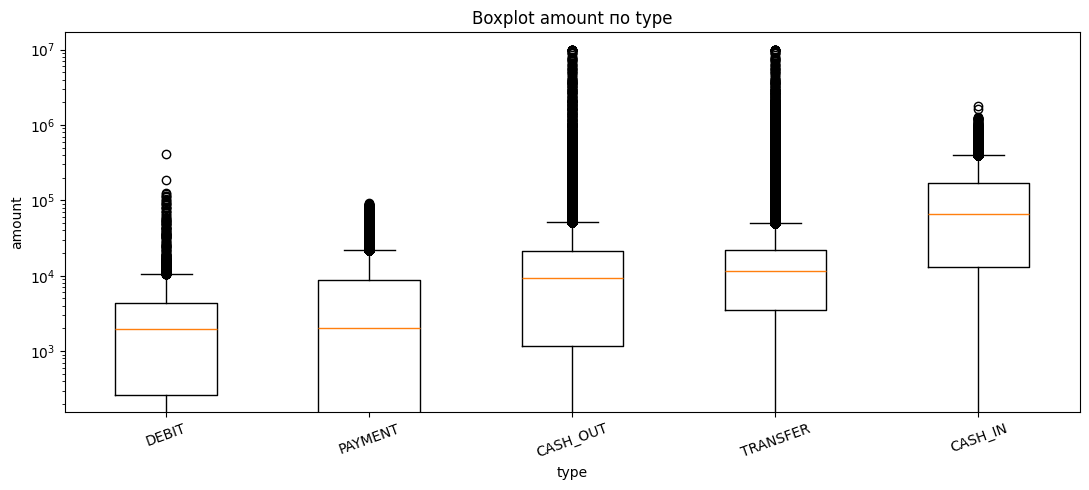

/tmp/ipython-input-2543380786.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=order, showfliers=True)


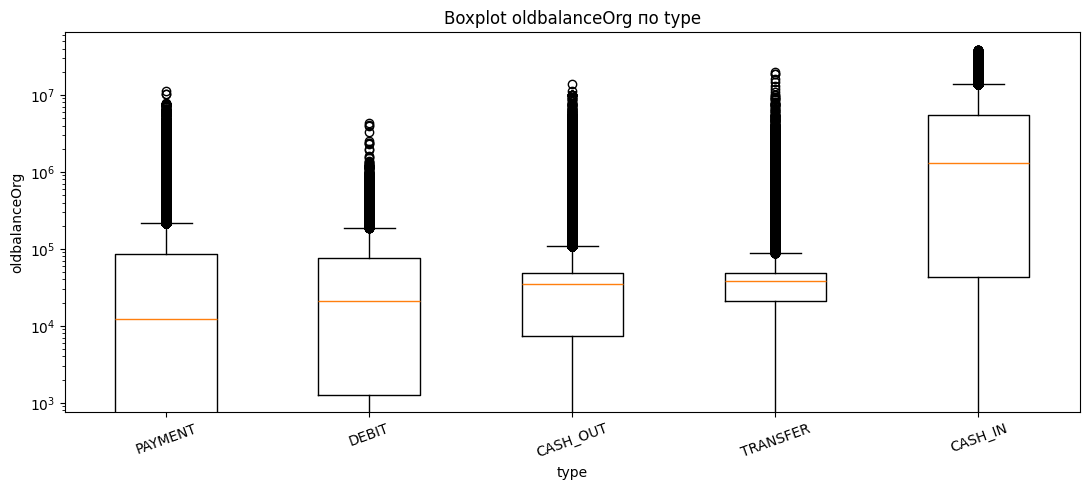

/tmp/ipython-input-2543380786.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(vals, labels=order, showfliers=True)


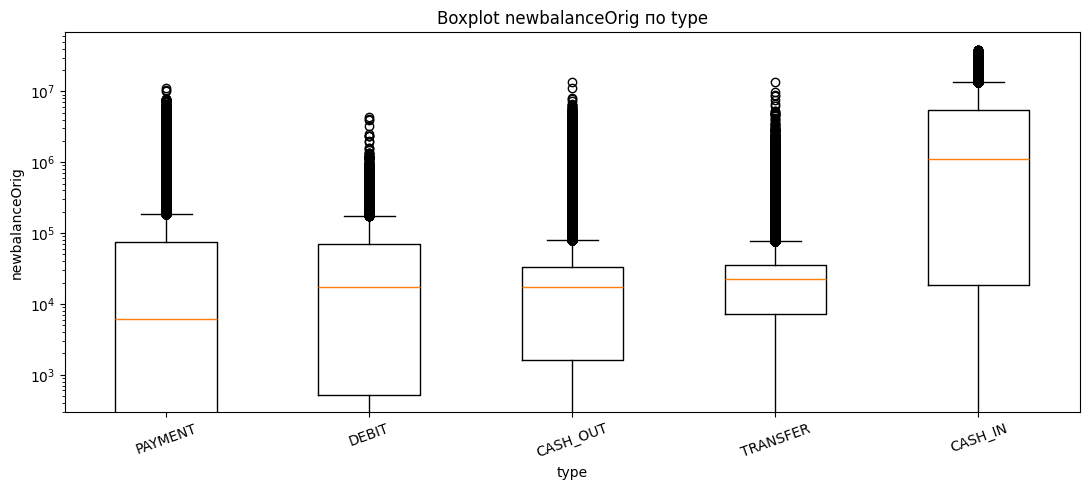

In [ ]:
order = (data
         .dropna(subset=['type', 'amount'])
         .groupby('type')['amount'].median()
         .sort_values().index.tolist())

vals = [data.loc[data['type']==g, 'amount'].dropna().values for g in order]

plt.figure(figsize=(11,5))
plt.boxplot(vals, labels=order, showfliers=True)
plt.title('Boxplot amount по type')
plt.xlabel('type'); plt.ylabel('amount'); plt.xticks(rotation=20)

plt.yscale('log') # без неё на картинке треш, так что я сжимаю
plt.tight_layout()
plt.show()


order = (data
         .dropna(subset=['type', 'oldbalanceOrg'])
         .groupby('type')['oldbalanceOrg'].median()
         .sort_values().index.tolist())

vals = [data.loc[data['type']==g, 'oldbalanceOrg'].dropna().values for g in order]

plt.figure(figsize=(11,5))
plt.boxplot(vals, labels=order, showfliers=True)
plt.title('Boxplot oldbalanceOrg по type')
plt.xlabel('type'); plt.ylabel('oldbalanceOrg'); plt.xticks(rotation=20)

plt.yscale('log')
plt.tight_layout()
plt.show()


order = (data
         .dropna(subset=['type', 'newbalanceOrig'])
         .groupby('type')['newbalanceOrig'].median()
         .sort_values().index.tolist())

vals = [data.loc[data['type']==g, 'newbalanceOrig'].dropna().values for g in order]

plt.figure(figsize=(11,5))
plt.boxplot(vals, labels=order, showfliers=True)
plt.title('Boxplot newbalanceOrig по type')
plt.xlabel('type'); plt.ylabel('newbalanceOrig'); plt.xticks(rotation=20)

plt.yscale('log') # без неё на картинке треш, так что я сжимаю
plt.tight_layout()
plt.show()


***Промежуточные выводы***


*   Во всех группах среднее значение больше медианного, т.е. есть смещение **вправо**
*   По IQR больше всего аномальных операций среди TRANSFER и CASH_OUT. CASH_IN тож подозрительный из-за крупных сумм, но разброс большой и доля выбросов из-за этого срезается


  


#### **Балансовая проверка**
Проверить соответствует ли разница между конечным и начальным балансом клиента сумме операции (а взимаются ли кста налоги/комиссии?) ---коммент у нас cash in тоже проходит как new_bal = old_bal - amount

In [ ]:
outs = ['TRANSFER', 'CASH_OUT', 'DEBIT', 'PAYMENT','CASH_IN']
ins = []

def our_new_balances(row):
    if row['type'] in outs:
        expected = row['oldbalanceOrg'] - row['amount']
    elif row['type'] in ins:
        expected = row['oldbalanceOrg'] + row['amount']
    return not np.isclose(row['newbalanceOrig'], expected, atol=0.05) #тру если разнятся по модулю больше, чем atol=0.5

data['our_new_balances'] = data.apply(our_new_balances, axis=1) #создаем столбец, где true несоответствие между конечным и начальным балансом
incons = data["our_new_balances"].sum()
print(f"Кол-во несоответствий {incons}")

inconsistent_transactions = data[data['our_new_balances']]
fraud_in_inconsistent = inconsistent_transactions['isFraud'].sum() #среди несоответствий вычисляем кол-во фродовых операций
print(f"Из них фродовых: {fraud_in_inconsistent}")

mismatch_by_type = data[data['our_new_balances']].groupby('type').size()
print("Несоответствия по типу транзакции:")
print(mismatch_by_type)

Кол-во несоответствий 0
Из них фродовых: 0
Несоответствия по типу транзакции:
Series([], dtype: int64)


> несоответстия между old и new балансами **отсутствуют**

#### **Профили по типам операций**

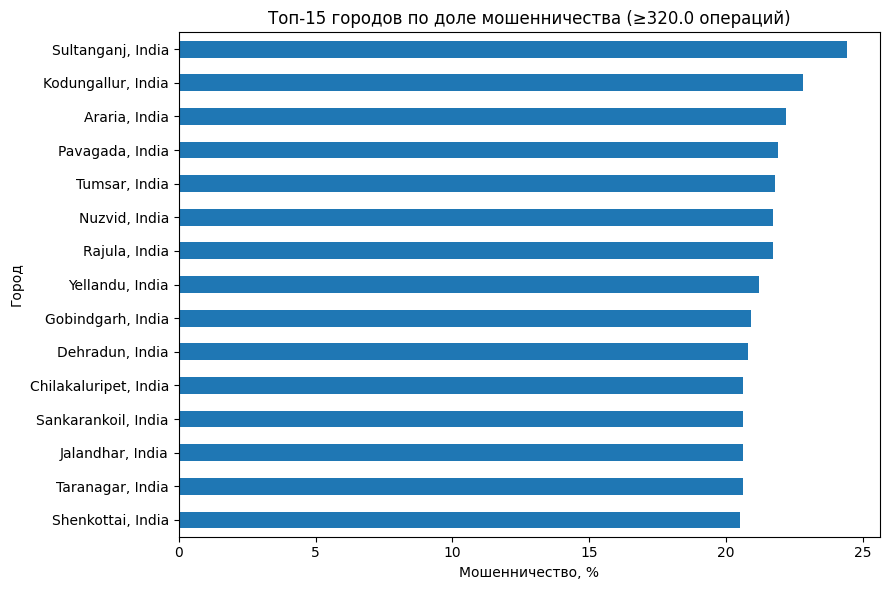

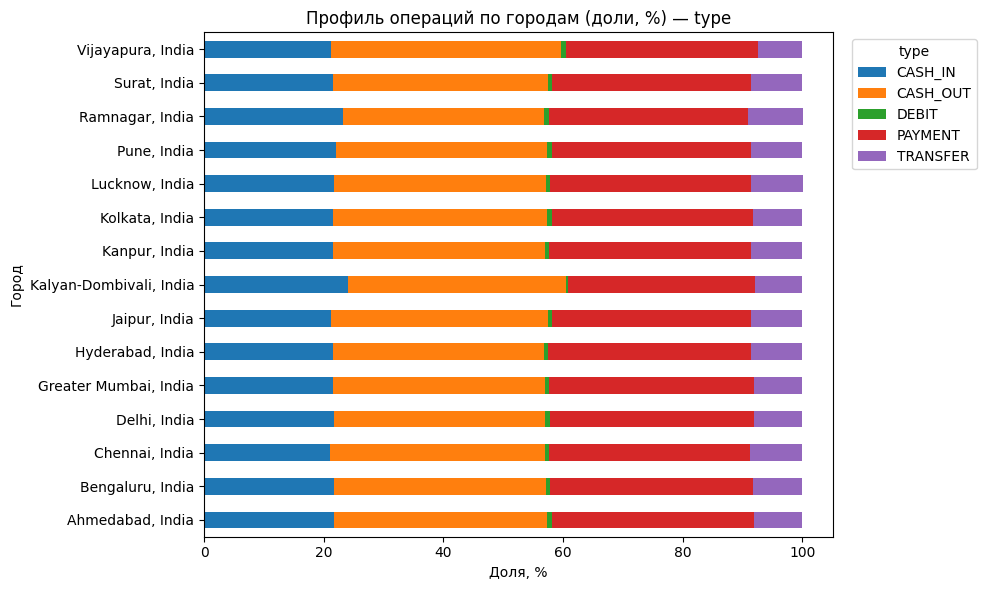

In [ ]:
top_n = 15  # число городов показывать в топах
min_tx = fraud_by_type['total_transactions'].quantile(0.75)  # порог по числу операций для рейтинга по доле фрода

# Агрегации по городам
fraud_by_type = (
    data.groupby('City')
        .agg(total_transactions=('isFraud', 'size'),
             fraud_count=('isFraud', 'sum'))
)

fraud_by_type['fraud_ratio'] = (fraud_by_type['fraud_count']
                                / fraud_by_type['total_transactions'] * 100).round(1)

cand = (fraud_by_type[fraud_by_type['total_transactions'] >= min_tx]
        .sort_values('fraud_ratio', ascending=False)
        .head(top_n))

cand['fraud_ratio'].sort_values().plot(kind='barh', figsize=(9,6), title=f'Топ-{top_n} городов по доле мошенничества (≥{min_tx} операций)')

plt.xlabel('Мошенничество, %')
plt.ylabel('Город')
plt.tight_layout()
plt.show()

op_col = 'type' if 'type' in data.columns else ('card_type' if 'card_type' in data.columns else None)


top_cities = top_activity.index
tmp = data[data['City'].isin(top_cities) & data[op_col].notna()]
counts = tmp.groupby(['City', op_col]).size().unstack(fill_value=0)
share = (counts.div(counts.sum(axis=1), axis=0) * 100).round(1)

ax = share.sort_index().plot(kind='barh', stacked=True, figsize=(10,6), title=f'Профиль операций по городам (доли, %) — {op_col}')
ax.set_xlabel('Доля, %')
ax.set_ylabel('Город')
ax.legend(title=op_col, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### **География операций и их частоты**
Выявить города где производились операции и города с наибольшей активностью и профиль частоты по типам операций/типам карт/или др признак

In [ ]:
fraud_by_type = data.groupby('City').agg(
    total_transactions=('isFraud', 'size'),
    fraud_count=('isFraud', 'sum'))
fraud_by_type['fraud_ratio'] = fraud_by_type['fraud_count'] / fraud_by_type['total_transactions']*100
fraud_by_type['fraud_ratio'] = fraud_by_type['fraud_ratio'].round(1)
fraud_by_type = fraud_by_type.sort_values('fraud_ratio', ascending=False)
print(fraud_by_type)

                       total_transactions  fraud_count  fraud_ratio
City                                                               
Godhra, India                          40           11         27.5
Azamgarh, India                        80           21         26.2
Kayamkulam, India                     240           60         25.0
Vellore, India                         40           10         25.0
Mahbubnagar, India                     40           10         25.0
...                                   ...          ...          ...
Jaggaiahpet, India                    120           11          9.2
Sathyamangalam, India                 120           11          9.2
Narkatiaganj, India                   120           11          9.2
Agra, India                            80            7          8.8
Varanasi, India                        40            3          7.5

[986 rows x 3 columns]


In [ ]:
data['City'].apply(lambda x: x.split(', ')[1]).unique()

array(['India'], dtype=object)

> Все операции совершались в Индии

###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**

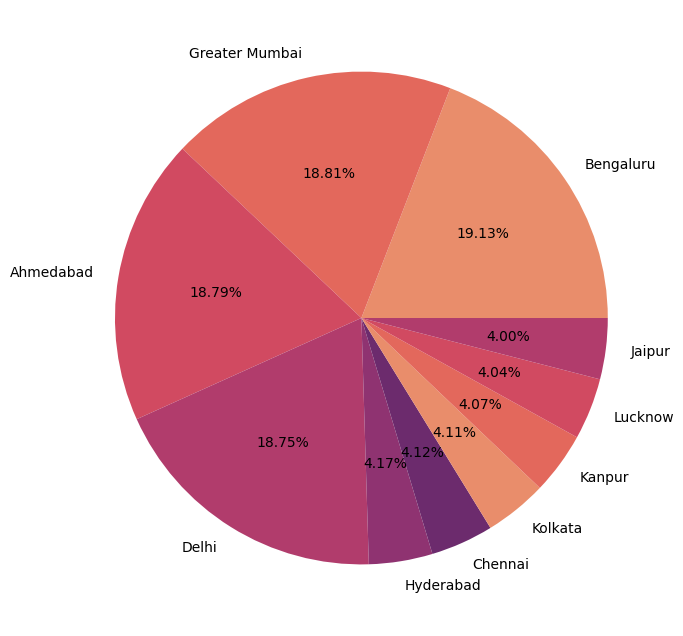

In [ ]:
display(Markdown('###**Круговая диаграмма распределения совершения транзакций по ТОП-10 городам**'))
top_transaction_cities = data['City'].apply(lambda x: x.split(', ')[0]).value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_transaction_cities.values, labels=top_transaction_cities.index, colors=sns.color_palette('flare'), autopct='%.2f%%')
plt.show()

> 4 крупнейших сегмента (вместе ~76%):

*   Бенгалуру
*   Дели
*   Ахмедабад
*   Мумбаи

> Остальные 6 городов (суммарно ~24%)
*   Хайдарабад
*   Ченнаи
*   Колката
*   Канпур
*   Лакхнау
*   Джайпур

#### **Профиль по card_type: какие операции преобладают во фроде**
Понять распределение type в разрезе типа карты. --- перевод и вывод ожидаемо наиболее фродовые операции

In [ ]:
fraud_by_type = data.groupby('type').agg(
    total_transactions=('isFraud', 'size'),
    fraud_count=('isFraud', 'sum'))
fraud_by_type['fraud_ratio'] = fraud_by_type['fraud_count'] / fraud_by_type['total_transactions']*100
fraud_by_type['fraud_ratio'] = fraud_by_type['fraud_ratio'].round(1)
fraud_by_type = fraud_by_type.sort_values('fraud_ratio', ascending=False)
print(fraud_by_type)

          total_transactions  fraud_count  fraud_ratio
type                                                  
TRANSFER               86752        58777         67.8
CASH_OUT              373641        91085         24.4
CASH_IN               227130        20807          9.2
DEBIT                   7178          303          4.2
PAYMENT               353873         4813          1.4


#### **Пики точёные**
Найти пики активности по датам --- по дням недели и месяцам не выявлено закономерности во фроде



In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y') #перевод в нормальную дату
data['DayOfWeek'] = data['Date'].dt.day_name()

fraud_by_dow = data.groupby('DayOfWeek').agg(
    total=('isFraud', 'size'),
    fraud=('isFraud', 'sum'))
fraud_by_dow['fraud_ratio'] = fraud_by_dow['fraud'] / fraud_by_dow['total']*100

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_by_dow = fraud_by_dow.reindex(day_order)

print('Процент фрода по дням недели:')
print(fraud_by_dow[['fraud', 'fraud_ratio']],"\n")

print('Процент фрода по месяцам:')
data['Month'] = data['Date'].dt.month_name()
monthly = data.groupby('Month').agg(
    total=('isFraud', 'size'),
    fraud=('isFraud', 'sum')
)
monthly['fraud_ratio'] = monthly['fraud'] / monthly['total']*100
monthly['fraud_ratio'] = monthly['fraud_ratio'].round(2)
print(monthly)



Процент фрода по дням недели:
           fraud  fraud_ratio
DayOfWeek                    
Monday     25112    16.828054
Tuesday    24847    16.657393
Wednesday  25065    16.697088
Thursday   25186    16.756483
Friday     25423    16.958389
Saturday   24882    16.670910
Sunday     25270    16.780440 

Процент фрода по месяцам:
           total  fraud  fraud_ratio
Month                               
April      95531  16109        16.86
August     65375  11012        16.84
December   98980  16596        16.77
February   90870  15226        16.76
January    99206  16608        16.74
July       65274  10828        16.59
June       86007  14213        16.53
March      98951  16686        16.86
May        98585  16450        16.69
November   95273  16036        16.83
October    91073  15375        16.88
September  63449  10646        16.78


#### **Ресёрч: красные флажки фродовых операций**
Собрать явные маркеры и отраслевые стандарты вычисления фрода применимые к нашаму датасету


Что можно глянуть:
*   https://www.fatf-gafi.org/content/dam/fatf-gafi/translations/reports/ITMCFM-Russian-Virtual-Assets-Red-Flag-Indicators-2020.pdf.coredownload.inline.pdf
*   https://cbr.ru/press/event/?id=18829



####**Корреляционная матрица и проверка на мультиколлинеарность**

---











Проверка на выбросы на скорую руку от 22.10.25

```
def vibros(df): # df = data['annual.inc']
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[(df < Q1-1.5*IQR) | (df > Q3+1.5*IQR)]
  print('Количество выбросов в данных:', outliers.shape[0])

vibros(data['amount'])
vibros(data['oldbalanceOrg'])
vibros(data['newbalanceOrig'])
```
---
Количество выбросов в данных: 167816
Количество выбросов в данных: 183191
Количество выбросов в данных: 193197
